In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tnrange,tqdm_notebook
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.cluster import KMeans
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression
from sklearn import cross_validation as CV

#디렉토리 경로 적어주세요
os.chdir("C:/Users/q/code_ref")


ImportError: cannot import name 'cross_validation' from 'sklearn' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\__init__.py)

In [2]:
#데이터 불러오기
AM_train = pd.read_csv("Auction_master_train.csv")


# 데이터 날짜변수랑 위치변수 가지고 놀기

In [3]:
#데이터 10개정도 탐색해보기
AM_train.head(10)

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,...,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,...,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,...,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,...,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,...,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,...,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000
5,2238,강제,일반,105437195,한마음감정,2017-01-03 00:00:00,2,1,8635.0,41.39,...,NaN,N,일산봉로,58.0,NaN,2017-10-25 00:00:00,배당,35.086933,129.065706,206989000
6,1923,임의,일반,137548730,미래새한감정,2016-01-19 00:00:00,3,2,7927.0,81.77,...,NaN,N,동삼서로,61.0,NaN,2016-11-03 00:00:00,배당,35.084049,129.070231,135500000
7,2527,임의,일반,506916971,부일감정,2016-04-28 00:00:00,2,1,331281.0,92.22,...,NaN,N,분포로,111.0,NaN,2016-11-22 00:00:00,배당,35.127808,129.112206,640299999
8,2259,강제,일반,40782876,금정감정,2016-03-08 00:00:00,2,1,1017.0,66.44,...,NaN,N,천마로27번길,10.0,NaN,2016-09-27 00:00:00,배당,35.080817,129.020155,77380000
9,2666,임의,일반,150000000,연산감정,2017-03-27 00:00:00,2,1,27447.2,78.52,...,NaN,N,재반로84번길,96.0,7.0,2017-12-27 00:00:00,배당,35.187903,129.130913,177070000


In [4]:
# 데이터 shape, 행1933개 , 열 41개
print(AM_train.shape)

(1933, 41)


In [5]:
#오늘로부터 이 날짜가 얼마나 지났느냐를 보려고 만든 함수
def change_datetime(x):
    today = datetime.date.today()
    #년, 월 , 일 int(숫자형식)으로 바꿔서 datetime형식으로 넣음
    someday = datetime.date(int(x[:4]), int(x[5:7]), int(x[8:10]))
    #오늘 뺴기 헤당 날짜
    diff = today - someday
    return diff.days

In [6]:
#보시다시피 한 행의 10번째 인덱스까지 날짜가 나와있다
AM_train["Appraisal_date"].head()

0    2017-07-26 00:00:00
1    2016-09-12 00:00:00
2    2016-11-22 00:00:00
3    2016-12-13 00:00:00
4    2016-03-07 00:00:00
Name: Appraisal_date, dtype: object

In [7]:
#날짜까지만 뽑게 apply시켜준다
AM_train["Appraisal_date"] = AM_train["Appraisal_date"].apply(lambda x : x[:10])
AM_train["First_auction_date"] = AM_train["First_auction_date"].apply(lambda x : x[:10])
AM_train["Final_auction_date"] = AM_train["Final_auction_date"].apply(lambda x : x[:10])
AM_train["Preserve_regist_date"] = AM_train["Preserve_regist_date"].apply(lambda x : x[:10])
AM_train["Close_date"] = AM_train["Close_date"].apply(lambda x : x[:10])

In [8]:
#오늘로부터 얼마나 지났는지 모두 바꾸는 apply
AM_train["Appraisal_date"] = AM_train["Appraisal_date"].apply(change_datetime)
AM_train["First_auction_date"] = AM_train["First_auction_date"].apply(change_datetime)
AM_train["Final_auction_date"] = AM_train["Final_auction_date"].apply(change_datetime)
AM_train["Preserve_regist_date"] = AM_train["Preserve_regist_date"].apply(change_datetime)
AM_train["Close_date"] = AM_train["Close_date"].apply(change_datetime)

In [9]:
#총감정가 - 최저매각가격
#최종 감정된 가격에 비해 최저로 매각해야하는 가격과 얼마나 차이가 났는가
AM_train["Diff_price"] = AM_train['Total_appraisal_price'] - AM_train['Minimum_sales_price']


In [10]:
#경매구분은 '임의'와 '강제'로 나뉜다
print(AM_train.Auction_class.unique())


['임의' '강제']


In [11]:
#임의와 강제로 나누어 더미변수화한다
AM_train.Auction_class.replace({'임의':0, '강제':1},inplace=True)
print(AM_train.Auction_class.unique())

[0 1]


In [12]:
#부산과 서울
print(AM_train.addr_do.unique())

['부산' '서울']


In [13]:
#부산과 서울 더미변수화
AM_train.addr_do.replace({'부산':0, '서울':1},inplace=True)

In [14]:
print(AM_train.addr_do.unique())

[0 1]


In [15]:
#건물(토지)의 대표용도의 하위변수
print(AM_train.Apartment_usage.unique())

['주상복합' '아파트']


In [16]:
#주상복합과 아파트 더미변수화
AM_train.Apartment_usage.replace({'주상복합':0, '아파트':1},inplace=True)
print(AM_train.Apartment_usage.unique())

[0 1]


In [17]:
#부산과 서울 기준으로 데이터를 2개로 분리한다
AM_train1 = AM_train[AM_train.addr_do == 0]
AM_train2 = AM_train[AM_train.addr_do == 1]

In [18]:
#어떤 낙찰가가 max값인지 살펴보기
AM_train.loc[AM_train.Hammer_price == AM_train.Hammer_price.max()]

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,...,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price,Diff_price
1521,10,1,일괄,8955865567,대신감정,1337,4,3,0.0,2665.84,...,N,남현길,96.0,NaN,643,배당,37.473014,126.974663,15151000000,13554200000


In [19]:
#어떤 총 감정가가 max값인지 살펴보기
AM_train[AM_train.Total_appraisal_price == AM_train.Total_appraisal_price.max()]

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,...,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price,Diff_price
1521,10,1,일괄,8955865567,대신감정,1337,4,3,0.0,2665.84,...,N,남현길,96.0,NaN,643,배당,37.473014,126.974663,15151000000,13554200000


In [20]:
#이제 컬럼은 42개다
len(AM_train.columns.tolist())

42

In [21]:
#컬럼명 보기
AM_train.columns

Index(['Auction_key', 'Auction_class', 'Bid_class', 'Claim_price',
       'Appraisal_company', 'Appraisal_date', 'Auction_count',
       'Auction_miscarriage_count', 'Total_land_gross_area',
       'Total_land_real_area', 'Total_land_auction_area',
       'Total_building_area', 'Total_building_auction_area',
       'Total_appraisal_price', 'Minimum_sales_price', 'First_auction_date',
       'Final_auction_date', 'Final_result', 'Creditor', 'addr_do', 'addr_si',
       'addr_dong', 'addr_li', 'addr_san', 'addr_bunji1', 'addr_bunji2',
       'addr_etc', 'Apartment_usage', 'Preserve_regist_date', 'Total_floor',
       'Current_floor', 'Specific', 'Share_auction_YorN', 'road_name',
       'road_bunji1', 'road_bunji2', 'Close_date', 'Close_result', 'point.y',
       'point.x', 'Hammer_price', 'Diff_price'],
      dtype='object')

In [22]:
#피쳐들을 한 변수에 넣는다
selected_features = AM_train.columns.tolist()
#피쳐들 넣은 변수에서 경매 아파트 고유 키값 없애기,
selected_features.remove('Auction_key')

In [23]:
#피쳐들
selected_features

['Auction_class',
 'Bid_class',
 'Claim_price',
 'Appraisal_company',
 'Appraisal_date',
 'Auction_count',
 'Auction_miscarriage_count',
 'Total_land_gross_area',
 'Total_land_real_area',
 'Total_land_auction_area',
 'Total_building_area',
 'Total_building_auction_area',
 'Total_appraisal_price',
 'Minimum_sales_price',
 'First_auction_date',
 'Final_auction_date',
 'Final_result',
 'Creditor',
 'addr_do',
 'addr_si',
 'addr_dong',
 'addr_li',
 'addr_san',
 'addr_bunji1',
 'addr_bunji2',
 'addr_etc',
 'Apartment_usage',
 'Preserve_regist_date',
 'Total_floor',
 'Current_floor',
 'Specific',
 'Share_auction_YorN',
 'road_name',
 'road_bunji1',
 'road_bunji2',
 'Close_date',
 'Close_result',
 'point.y',
 'point.x',
 'Hammer_price',
 'Diff_price']

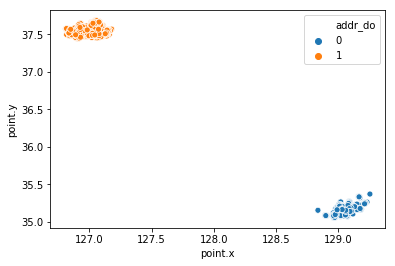

In [24]:
#부산과 서울별로 위도 시각화
#부산은 0, 서울은 1
##hue별로 색깔이 달라짐
sns.scatterplot(x="point.x", y="point.y", hue = "addr_do", data = AM_train)

# 데이터 탐색

In [25]:
#자료형 맨 오른쪽에 나오고
#null값은 다행이 없다
#데이터 갯수도 왼편에 나온다
AM_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 42 columns):
Auction_key                    1933 non-null int64
Auction_class                  1933 non-null int64
Bid_class                      1933 non-null object
Claim_price                    1933 non-null int64
Appraisal_company              1933 non-null object
Appraisal_date                 1933 non-null int64
Auction_count                  1933 non-null int64
Auction_miscarriage_count      1933 non-null int64
Total_land_gross_area          1933 non-null float64
Total_land_real_area           1933 non-null float64
Total_land_auction_area        1933 non-null float64
Total_building_area            1933 non-null float64
Total_building_auction_area    1933 non-null float64
Total_appraisal_price          1933 non-null int64
Minimum_sales_price            1933 non-null int64
First_auction_date             1933 non-null int64
Final_auction_date             1933 non-null int64
Final_result  

In [26]:
AM_train.describe()

,Auction_key,Auction_class,Claim_price,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,...,Preserve_regist_date,Total_floor,Current_floor,road_bunji1,road_bunji2,Close_date,point.y,point.x,Hammer_price,Diff_price
count,1933.000000,1933.000000,1.933000e+03,1933.000000,1933.000000,1933.000000,1.933000e+03,1933.000000,1933.000000,1933.000000,...,1933.000000,1933.000000,1933.000000,1909.000000,155.000000,1933.000000,1933.000000,1933.000000,1.933000e+03,1.933000e+03
mean,1380.271081,0.255561,3.703908e+08,979.528712,1.836006,0.788412,3.458714e+04,42.333802,41.310776,96.417693,...,14497.593895,16.980859,8.817900,127.441069,12.748387,2680.862390,36.698018,127.731667,4.726901e+08,8.176369e+07
std,801.670470,0.436289,1.337869e+09,306.357673,0.938319,0.831715,9.442101e+04,65.274404,65.385900,106.323240,...,47934.552645,9.509021,8.044644,188.394217,10.735663,25983.865371,1.150269,0.993055,5.574493e+08,3.350529e+08
min,1.000000,0.000000,0.000000e+00,405.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,9.390000,...,584.000000,3.000000,0.000000,1.000000,1.000000,153.000000,35.051385,126.809393,6.303000e+06,0.000000e+00
25%,691.000000,0.000000,7.746112e+07,766.000000,1.000000,0.000000,2.997000e+03,25.870000,24.570000,61.520000,...,4860.000000,12.000000,3.000000,24.000000,5.000000,443.000000,35.188590,126.959167,1.975550e+08,0.000000e+00
50%,1395.000000,0.000000,1.728143e+08,954.000000,2.000000,1.000000,1.424140e+04,37.510000,36.790000,84.900000,...,6958.000000,15.000000,7.000000,57.000000,9.000000,659.000000,37.500862,127.065003,3.544500e+08,4.080000e+07
75%,2062.000000,1.000000,3.565089e+08,1137.000000,2.000000,1.000000,4.140310e+04,51.790000,51.320000,114.940000,...,9637.000000,21.000000,12.000000,145.000000,17.500000,819.000000,37.566116,129.018054,5.599000e+08,9.600000e+07
max,2762.000000,1.000000,2.286481e+10,3126.000000,13.000000,9.000000,3.511936e+06,2665.840000,2665.840000,4255.070000,...,331343.000000,80.000000,65.000000,1716.000000,55.000000,331343.000000,37.685575,129.255872,1.515100e+10,1.355420e+10


In [27]:
#연속형 변수 label과 상관계수 본다음 정렬하기(ascending=False는 내림차순)
corr_matrix = AM_train.corr()
corr_matrix["Hammer_price"].sort_values(ascending=False)

Hammer_price                   1.000000
Minimum_sales_price            0.994592
Total_appraisal_price          0.953464
Total_building_auction_area    0.772839
Total_building_area            0.768454
Diff_price                     0.747443
Total_land_auction_area        0.700639
Total_land_real_area           0.696099
addr_do                        0.306488
point.y                        0.295698
Claim_price                    0.267728
Total_floor                    0.220830
road_bunji2                    0.206681
Current_floor                  0.198013
Preserve_regist_date           0.074827
Total_land_gross_area          0.070466
road_bunji1                    0.020404
Appraisal_date                 0.020075
First_auction_date             0.012063
Apartment_usage                0.004344
Final_auction_date             0.004150
Close_date                    -0.000111
addr_bunji1                   -0.003139
addr_bunji2                   -0.003641
Auction_miscarriage_count     -0.011296


In [28]:
#생각해보면 상관계수는 절대값이 더 중요하다
#절대값 넣는 함수 abs
abs(corr_matrix["Hammer_price"]).sort_values(ascending=False)

Hammer_price                   1.000000
Minimum_sales_price            0.994592
Total_appraisal_price          0.953464
Total_building_auction_area    0.772839
Total_building_area            0.768454
Diff_price                     0.747443
Total_land_auction_area        0.700639
Total_land_real_area           0.696099
Auction_key                    0.418769
addr_do                        0.306488
point.x                        0.296312
point.y                        0.295698
Claim_price                    0.267728
Total_floor                    0.220830
road_bunji2                    0.206681
Current_floor                  0.198013
Preserve_regist_date           0.074827
Total_land_gross_area          0.070466
Auction_class                  0.054813
road_bunji1                    0.020404
Appraisal_date                 0.020075
Auction_count                  0.016999
First_auction_date             0.012063
Auction_miscarriage_count      0.011296
Apartment_usage                0.004344


In [29]:
# 상관계수 낮은 15개 버리기 피쳐
cor_a = abs(corr_matrix["Hammer_price"]).sort_values(ascending=False)
low_cor_index = cor_a.tail(15).index

In [30]:
new_AM_train = AM_train.drop(list(low_cor_index),axis=1)

In [31]:
#27개로 줄은 피쳐
new_AM_train.shape

(1933, 27)

In [32]:
new_AM_train.columns

Index(['Auction_key', 'Bid_class', 'Claim_price', 'Appraisal_company',
       'Total_land_real_area', 'Total_land_auction_area',
       'Total_building_area', 'Total_building_auction_area',
       'Total_appraisal_price', 'Minimum_sales_price', 'Final_result',
       'Creditor', 'addr_do', 'addr_si', 'addr_dong', 'addr_li', 'addr_san',
       'addr_etc', 'Total_floor', 'Specific', 'Share_auction_YorN',
       'road_name', 'Close_result', 'point.y', 'point.x', 'Hammer_price',
       'Diff_price'],
      dtype='object')

In [70]:
#레이블 summary
AM_train.Hammer_price.describe()

count    1.933000e+03
mean     4.726901e+08
std      5.574493e+08
min      6.303000e+06
25%      1.975550e+08
50%      3.544500e+08
75%      5.599000e+08
max      1.515100e+10
Name: Hammer_price, dtype: float64

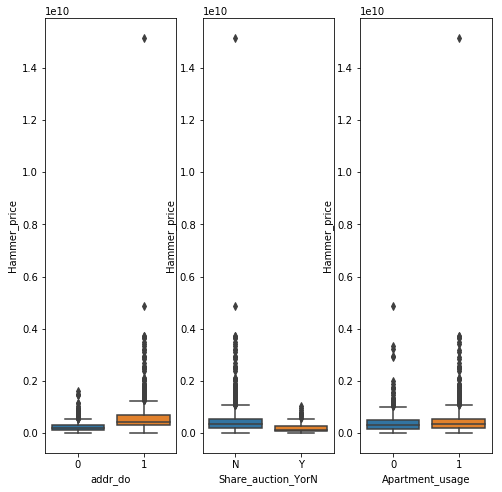

In [33]:
#Share_auction_YorN,addr_do시각화
fig, axs = plt.subplots(ncols=3, figsize=(8, 8))
sns.boxplot(x='Share_auction_YorN', y='Hammer_price',data=AM_train, ax=axs[1])
sns.boxplot(y = 'Hammer_price', x = 'addr_do', data = AM_train, ax=axs[0])
sns.boxplot(x='Apartment_usage', y='Hammer_price',data=AM_train, ax=axs[2])


In [34]:
#Creditor를 시각화 해보겠음
AM_train.Creditor.unique()[:10]

array(['베리타스자산관리대부', '흥국저축은행', '국민은행', '고려저축은행', 'Private', '서울보증보험',
       '천마(새)', '대형선망수협', '디에이치대부', '코카콜라음료'], dtype=object)

In [35]:
AM_train.Creditor = AM_train.Creditor.apply(lambda x : x if x == 'Private' else 'Company')
AM_train.Creditor.unique()


array(['Company', 'Private'], dtype=object)

In [41]:
#AM_train를 creditor와 addr_do로 평균내보기
AM_train.groupby(['Creditor', 'addr_do'])['Hammer_price'].mean()

Creditor  addr_do
Company   0          2.485329e+08
          1          6.120714e+08
Private   0          2.285114e+08
          1          5.649978e+08
Name: Hammer_price, dtype: float64

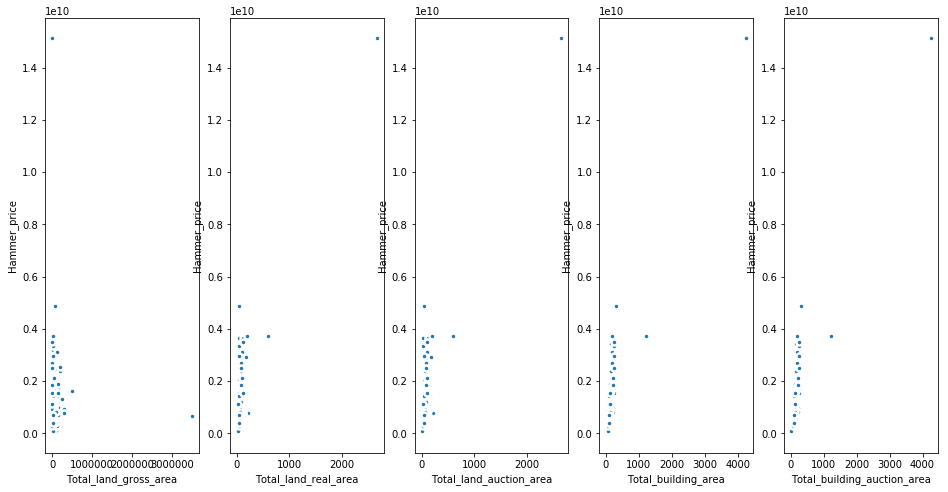

In [49]:
#시각화, 이상치때문에 이쁘게 안됨, ylim을 조절하거나 이상치를 빼는 것도 방법이다
# 서울만 scatterplot 시각화
fig, axs = plt.subplots(ncols=5, figsize=(16, 8))
sns.scatterplot(x='Total_land_gross_area',y = 'Hammer_price' ,data=AM_train[AM_train.addr_do == 1], linewidth=2.5, ax=axs[0])
sns.scatterplot(x='Total_land_real_area',y = 'Hammer_price',data=AM_train[AM_train.addr_do == 1], linewidth=2.5, ax=axs[1])
sns.scatterplot(x='Total_land_auction_area',y = 'Hammer_price',data=AM_train[AM_train.addr_do == 1], linewidth=2.5, ax=axs[2])
sns.scatterplot(x='Total_building_area',y = 'Hammer_price',data=AM_train[AM_train.addr_do == 1], linewidth=2.5, ax=axs[3])
sns.scatterplot(x='Total_building_auction_area',y = 'Hammer_price',data=AM_train[AM_train.addr_do == 1], linewidth=2.5, ax=axs[4])

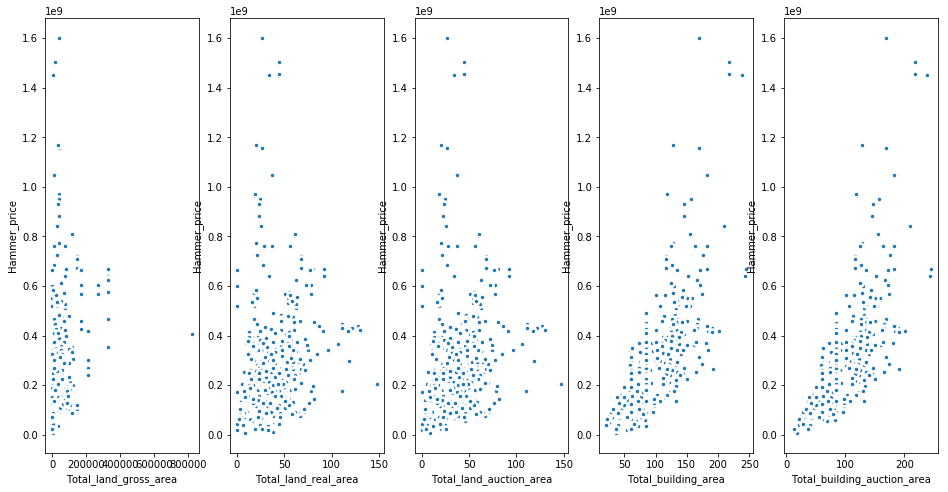

In [51]:
#부산 scatterplot 시각화
fig, axs = plt.subplots(ncols=5, figsize=(16, 8))
sns.scatterplot(x='Total_land_gross_area',y = 'Hammer_price' ,data=AM_train[AM_train.addr_do == 0], linewidth=2.5, ax=axs[0])
sns.scatterplot(x='Total_land_real_area',y = 'Hammer_price',data=AM_train[AM_train.addr_do == 0], linewidth=2.5, ax=axs[1])
sns.scatterplot(x='Total_land_auction_area',y = 'Hammer_price',data=AM_train[AM_train.addr_do == 0], linewidth=2.5, ax=axs[2])
sns.scatterplot(x='Total_building_area',y = 'Hammer_price',data=AM_train[AM_train.addr_do == 0], linewidth=2.5, ax=axs[3])
sns.scatterplot(x='Total_building_auction_area',y = 'Hammer_price',data=AM_train[AM_train.addr_do == 0], linewidth=2.5, ax=axs[4])

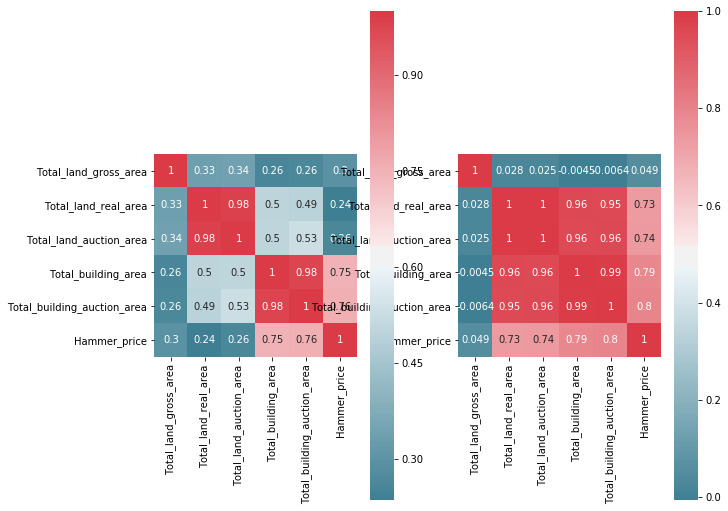

In [54]:
#corr 히트맵이다
#서로 너무 corr이 높은 것은 처리가 필요해보인다
area_list = ['Total_land_gross_area', 'Total_land_real_area', 'Total_land_auction_area', 'Total_building_area', 'Total_building_auction_area', 'Hammer_price']
AM_train[area_list][AM_train.addr_do == 0].corr()
f, ax = plt.subplots(ncols=2, figsize=(10, 9))
sns.heatmap(AM_train[area_list][AM_train.addr_do == 0].corr(), mask=np.zeros_like(AM_train[area_list][AM_train.addr_do == 0].corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax[0], annot=True)
sns.heatmap(AM_train[area_list][AM_train.addr_do == 1].corr(), mask=np.zeros_like(AM_train[area_list][AM_train.addr_do == 1].corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax[1], annot=True)

In [55]:
#토지에 비해 건물의 면적이 많으면 어떤 영향을 줄까?

#총건물경매면적/총토지경매면적
AM_train['BA_TA'] = AM_train['Total_building_auction_area'] / AM_train['Total_land_auction_area']
#총건물면적/총토지실면적
AM_train['BTA_TR'] = AM_train['Total_building_area'] / AM_train['Total_land_real_area']

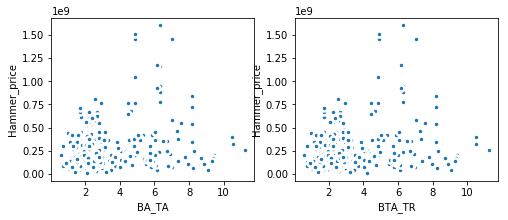

In [56]:
#만들어본 파생변수 시각화
#plot은 나름대로 알아서 해석
fig, axs = plt.subplots(ncols=2, figsize=(8, 3))
sns.scatterplot(x='BA_TA',y = 'Hammer_price' ,data=AM_train[AM_train.addr_do == 0], linewidth=2.5, ax=axs[0])
sns.scatterplot(x='BTA_TR',y = 'Hammer_price',data=AM_train[AM_train.addr_do == 0], linewidth=2.5, ax=axs[1])

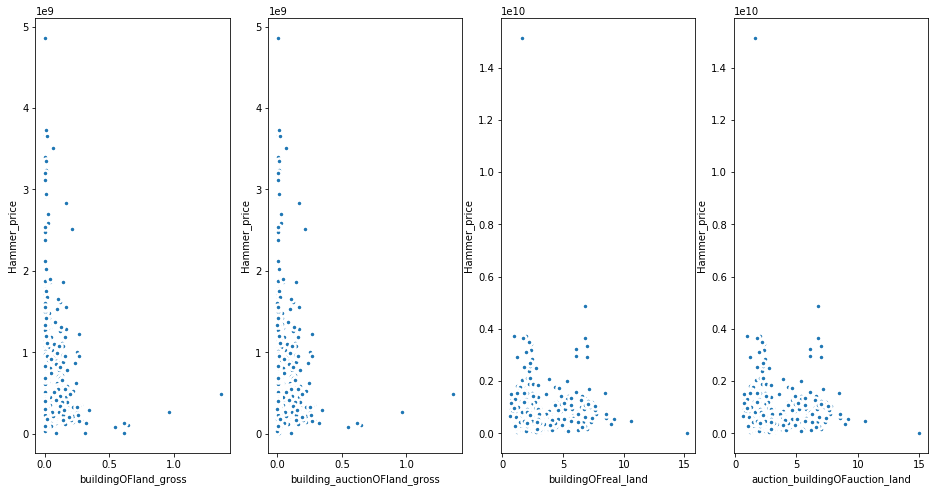

In [57]:
#파생변수 만들어서
AM_train['buildingOFland_gross'] = AM_train.Total_building_area / AM_train.Total_land_gross_area
AM_train['building_auctionOFland_gross'] = AM_train.Total_building_auction_area / AM_train.Total_land_gross_area
AM_train['buildingOFreal_land'] = AM_train["Total_building_area"] / AM_train["Total_land_real_area"]
AM_train['auction_buildingOFauction_land'] = AM_train["Total_building_auction_area"] / AM_train["Total_land_auction_area"]
#지역별로 시각화 요긴 서울



fig, axs = plt.subplots(ncols=4, figsize=(16, 8))
sns.scatterplot(x='buildingOFland_gross',y = 'Hammer_price' ,data=AM_train[AM_train.addr_do == 1], linewidth=2.5, ax=axs[0])
sns.scatterplot(x='building_auctionOFland_gross',y = 'Hammer_price',data=AM_train[AM_train.addr_do == 1], linewidth=2.5, ax=axs[1])
sns.scatterplot(x='buildingOFreal_land',y = 'Hammer_price',data=AM_train[AM_train.addr_do == 1], linewidth=2.5, ax=axs[2])
sns.scatterplot(x='auction_buildingOFauction_land',y = 'Hammer_price',data=AM_train[AM_train.addr_do == 1], linewidth=2.5, ax=axs[3])


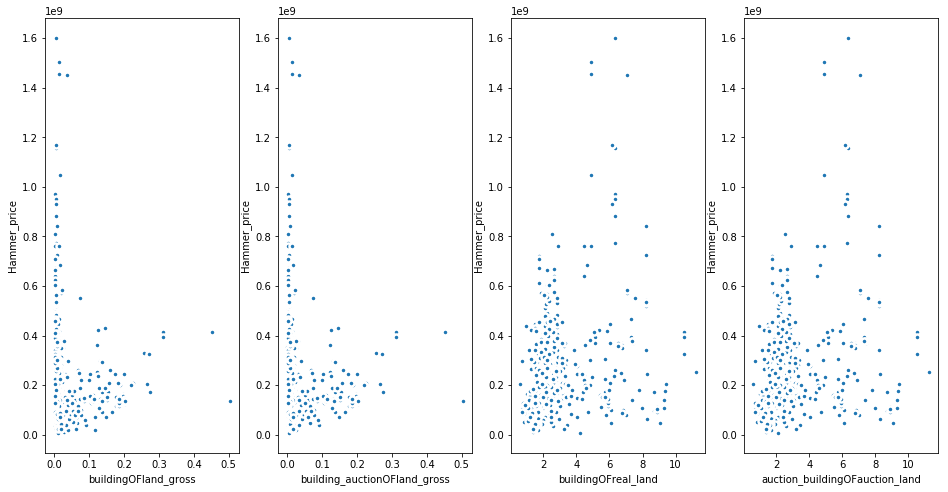

In [58]:
##여긴 부산

fig, axs = plt.subplots(ncols=4, figsize=(16, 8))
sns.scatterplot(x='buildingOFland_gross',y = 'Hammer_price' ,data=AM_train[AM_train.addr_do == 0], linewidth=2.5, ax=axs[0])
sns.scatterplot(x='building_auctionOFland_gross',y = 'Hammer_price',data=AM_train[AM_train.addr_do == 0], linewidth=2.5, ax=axs[1])
sns.scatterplot(x='buildingOFreal_land',y = 'Hammer_price',data=AM_train[AM_train.addr_do == 0], linewidth=2.5, ax=axs[2])
sns.scatterplot(x='auction_buildingOFauction_land',y = 'Hammer_price',data=AM_train[AM_train.addr_do == 0], linewidth=2.5, ax=axs[3])

In [62]:
#경매횟수, 유찰횟수 등 파생변수 만들어보기
AM_train['Auction_carriage_count'] = AM_train["Auction_count"] - AM_train["Auction_miscarriage_count"]
AM_train['Per_miscarriage_count'] = AM_train["Auction_miscarriage_count"] / AM_train["Auction_count"]
AM_train['Per_carriage_count'] = AM_train["Auction_carriage_count"] / AM_train["Auction_count"]



In [63]:
count_list = ["Auction_count", "Auction_miscarriage_count", "Auction_carriage_count",
             "Per_miscarriage_count", "Per_carriage_count"]
AM_train[count_list].head()


,Auction_count,Auction_miscarriage_count,Auction_carriage_count,Per_miscarriage_count,Per_carriage_count
0,2,1,1,0.500000,0.500000
1,2,1,1,0.500000,0.500000
2,3,2,1,0.666667,0.333333
3,2,1,1,0.500000,0.500000
4,2,1,1,0.500000,0.500000


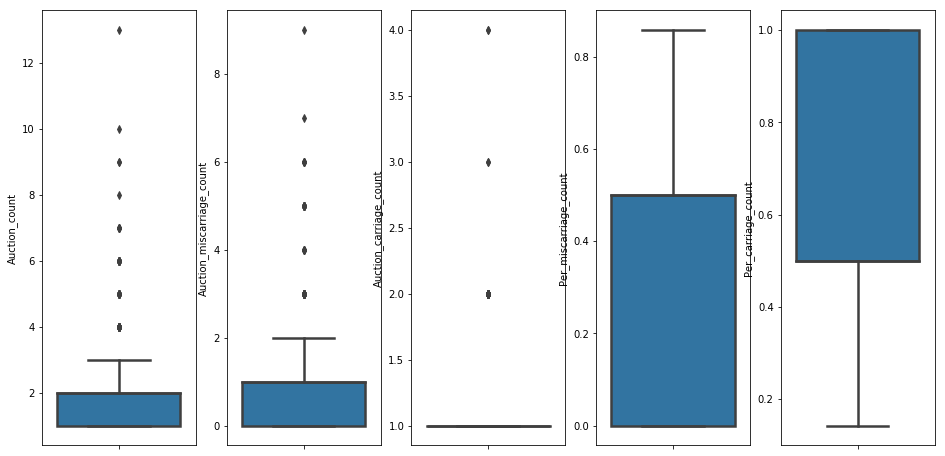

In [64]:
#파생변수 만든 것들이 어떤 범위내에서 분포하는지 보기
fig, axs = plt.subplots(ncols=5, figsize=(16, 8))
for i,j in enumerate(count_list):
    sns.boxplot(y=j,data=AM_train, linewidth=2.5, ax=axs[i])

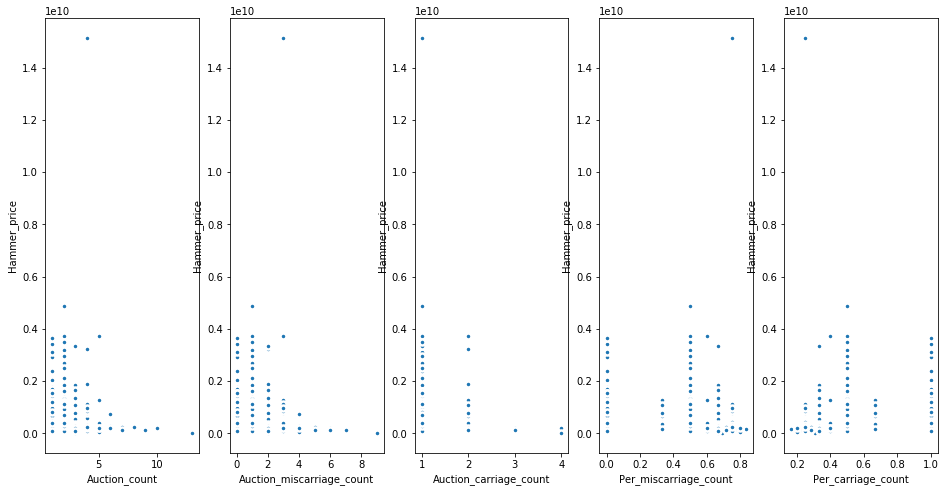

In [65]:
#레이블과는 어떤 분포로 이루어져있는지 확인
fig, axs = plt.subplots(ncols=5, figsize=(16, 8))
for i,j in enumerate(count_list):
    sns.scatterplot(x=j,y = 'Hammer_price' ,data=AM_train[AM_train.addr_do == 1], linewidth=2.5, ax=axs[i])

## 회귀분석

In [96]:
#상관계수로 자른 변수로 회귀분석을 해보겠음
#처리힘든 변수는 삭제
new_AM_train
del new_AM_train['addr_etc']
del new_AM_train['road_name']
del new_AM_train['Specific']
del new_AM_train['Appraisal_company']

In [68]:
#Auction_key는 변수가 아니므로 삭제
del new_AM_train['Auction_key']

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(new_AM_train.Hammer_price, new_AM_train.drop('Hammer_price',axis=1))
predictions = model_diabetes.predict(diabetes.data)
plt.scatter(diabetes.target, predictions)

In [97]:
#더미화 한 후 모델 만들고 crossvalidation으로 검증
x = new_AM_train.drop('Hammer_price',axis=1)
x = pd.get_dummies(x)
y = new_AM_train.Hammer_price
model = LinearRegression()
#cv는 10-fold라는 뜻, scoring은 어떤 지표를 쓸거냐
scores = CV.cross_val_score(model,x, y, cv=10, scoring='neg_mean_squared_error')


In [98]:
scores

array([-2.12043842e+17, -3.29157682e+19, -1.23605647e+17, -2.14289869e+15,
       -3.29990363e+15, -9.99758870e+17, -7.22600590e+17, -5.20458553e+16,
       -7.61914000e+19, -2.56568534e+20])

In [100]:
#최종 정확도(rmse)
scores.mean()

-3.6779119943082856e+19

In [107]:
int(-3.6779119943082856e+19)

-36779119943082856448